In [2]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

<IPython.core.display.Javascript object>


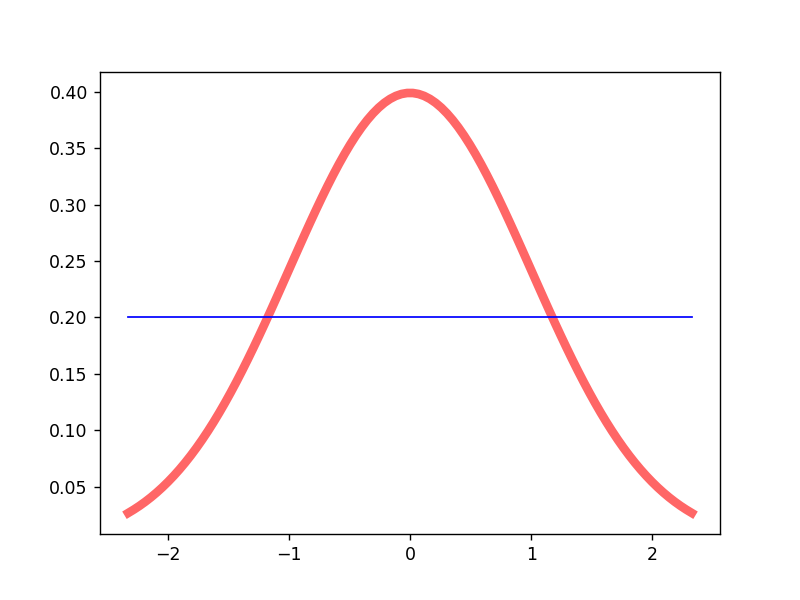

In [3]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()


In [4]:
import pandas as pd
df = pd.read_csv("data/TCL_wt1.tsv", sep = "\t")
df = df.dropna()
df = df.reset_index()
df

,index,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
0,0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075816993,-3.721334942,0.000055,4.260067469
1,1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810458,-3.429568818,0.000351,3.45462743
2,2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614379,-3.284695189,0.000027,4.571899347
3,4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108496732,-3.204276506,0.019963,1.699767669
4,5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183007,-3.009460329,0.036746,1.434786589
...,...,...,...,...,...,...,...,...
1741,2011,P77330,Prophage lipoprotein Bor homolog OS=Escherichi...,borD,1.535947712,0.619129104,0.310725,0.507623276
1742,2016,P02930,Outer membrane protein TolC OS=Escherichia col...,tolC,1.552287582,0.634395861,0.013373,1.873756665
1743,2020,P0A917,Outer membrane protein X OS=Escherichia coli (...,ompX,1.579738562,0.65968582,0.002226,2.652390664
1744,2021,P02931,Outer membrane protein F OS=Escherichia coli (...,ompF,1.754901961,0.811390435,0.000068,4.16495627


In [5]:
Log2 = list(df.iloc[ : , 5])
Log2_values = [float(item) for item in Log2]
len(Log2_values)

1746

<IPython.core.display.Javascript object>


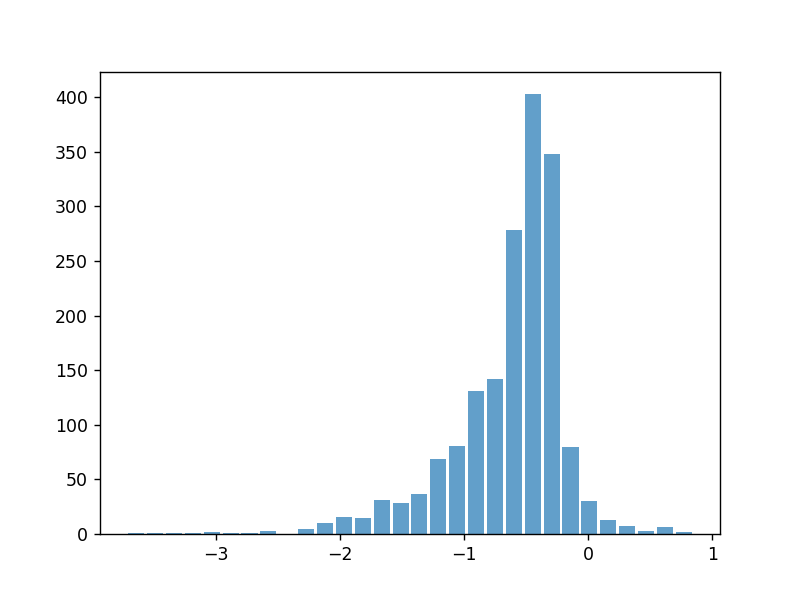

In [6]:
fig, ax = plt.subplots()

ax.hist(Log2_values, bins = 30,  alpha=0.7, rwidth=0.85)
ax.

fig.show()


### Estimation de la moyenne et de l'ecart-type en d'une loi normale :

In [7]:
mean_estimated = np.mean(Log2_values)
mean_estimated

-0.63862621564433

Variance estimée = (n/n-1)*variance de l'échantillon

In [13]:
n = len(Log2_values)
var_estimated = (n/(n-1))* (np.var(Log2_values))
std_estimated  = np.sqrt(var_estimated)
std_estimated

0.4707593462304346

<IPython.core.display.Javascript object>


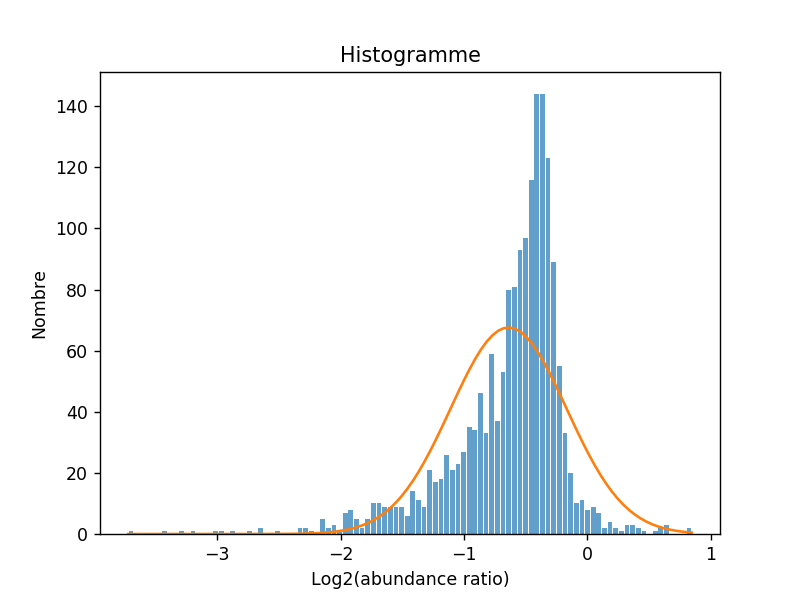

In [34]:
fig, ax = plt.subplots()

hist = ax.hist(Log2_values, bins = 100,  alpha=0.7, rwidth=0.85)

x = np.linspace(min(Log2_values), max(Log2_values), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(Log2_values)*dx # scale accordingly
ax.plot(x, norm.pdf(x, mean_estimated, np.sqrt(var_estimated))*scale) # compute theoritical PDF and draw it
ax.set_xlabel("Log2(abundance ratio)")
ax.set_ylabel("Nombre")
ax.set_title("Histogramme")
fig.savefig('assets/histo.png')
fig.show()

In [48]:
Log_pval = list(df.iloc[ : , 7])
Log_pval = [float(item) for item in Log_pval]

<IPython.core.display.Javascript object>


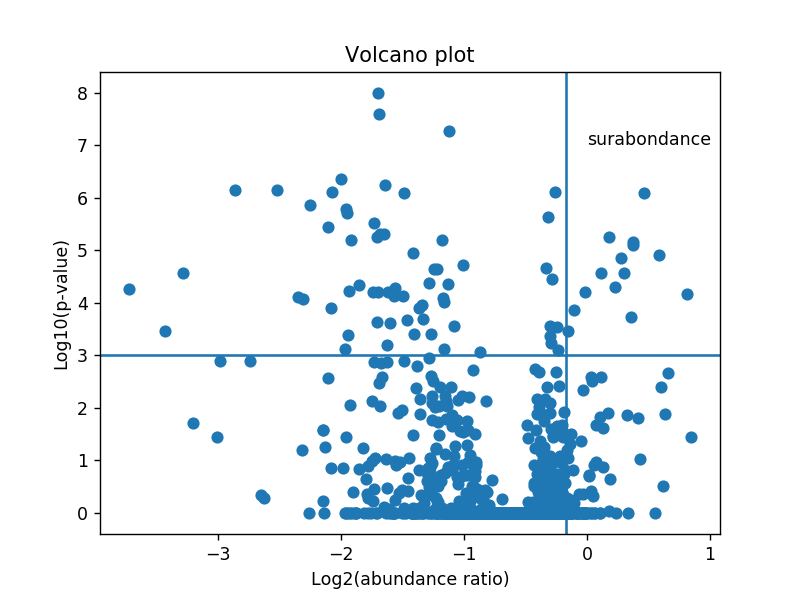

In [61]:
import math

fig, ax = plt.subplots()
ax.scatter (Log2_values, Log_pval)
ax.axhline(y=-math.log10(0.001))
ax.axvline(x=(-0.639+0.471))
ax.text(0, 7, 'surabondance')
ax.set_xlabel("Log2(abundance ratio)")
ax.set_ylabel("Log10(p-value)")
ax.set_title("Volcano plot")
fig.savefig('assets/volcano_plot.png')
fig.show()

In [60]:
all_prot =  list(df.iloc[ : , 1])
prot_surabondantes = []

for prot in range(len(all_prot)):
    if Log2_values[prot] >  (mean_estimated + std_estimated) and Log_pval[prot] > -math.log10(0.001):
        prot_surabondantes.append(all_prot[prot])
prot_surabondantes

['P0A8V6',
 'P0A9Q1',
 'P02358',
 'P0ACF8',
 'P62399',
 'P0A905',
 'P76506',
 'P13036',
 'P10384',
 'P06971',
 'P0A910',
 'P06996',
 'P76344',
 'P02931']